# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('..', 'utils')))
from data_explorer import DataExplorer

## Reading every dataset & 1rst EDA

In [3]:
df_2015 = pd.read_csv('../data/2015.csv')
df_2016 = pd.read_csv('../data/2016.csv')
df_2017 = pd.read_csv('../data/2017.csv')
df_2018 = pd.read_csv('../data/2018.csv')
df_2019 = pd.read_csv('../data/2019.csv')

In [9]:
print(f"2015 dataset columns: \n{list(df_2015.columns)} \n")
print(f"2016 dataset columns: \n{list(df_2016.columns)} \n")
print(f"2017 dataset columns: \n{list(df_2017.columns)} \n")
print(f"2018 dataset columns: \n{list(df_2018.columns)} \n")
print(f"2019 dataset columns: \n{list(df_2019.columns)} \n")

2015 dataset columns: 
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2016 dataset columns: 
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2017 dataset columns: 
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 

2018 dataset columns: 
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] 

2019 d

As we can see, we have different column names for each .csv file, so we need to change them to standard column names

# Column Standardization  
In this part of the notebook, we standardize all datasets and also add a 'year' column to distinguish the year for each row

In [ ]:
columns = {
"Happiness Rank":"happiness_rank",
"Country":"country",
"Happiness Score":"happiness_score",
"Economy (GDP per Capita)":"GDP_per_capita",
"Health (Life Expectancy)":"life_expectancy",
"Freedom":"freedom",
"Trust (Government Corruption)":"perceptions_corruption",
"Generosity":"generosity"
}
df_2015.rename(columns=columns, inplace = True)
df_2015 = df_2015[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2015["year"] = 2015

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [ ]:
columns = {
"Happiness Rank":"happiness_rank",
"Country":"country",
"Happiness Score":"happiness_score",
"Economy (GDP per Capita)":"GDP_per_capita",
"Health (Life Expectancy)":"life_expectancy",
"Freedom":"freedom",
"Trust (Government Corruption)":"perceptions_corruption",
"Generosity":"generosity"
}
df_2016.rename(columns=columns, inplace = True)
df_2016 = df_2016[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2016["year"] = 2016

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [ ]:
columns = {
"Happiness.Rank":"happiness_rank",
"Country":"country",
"Happiness.Score":"happiness_score",
"Economy..GDP.per.Capita.":"GDP_per_capita",
"Health..Life.Expectancy.":"life_expectancy",
"Trust..Government.Corruption.":"perceptions_corruption",
"Freedom":"freedom",
"Generosity":"generosity"
}
df_2017.rename(columns=columns, inplace = True)
df_2017 = df_2017[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2017["year"] = 2017

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [ ]:
columns = {
"Overall rank":"happiness_rank",
"Country or region":"country",
"Score":"happiness_score",
"GDP per capita":"GDP_per_capita",
"Healthy life expectancy":"life_expectancy",
"Freedom to make life choices":"freedom",
"Perceptions of corruption":"perceptions_corruption",
"Generosity":"generosity"
}
df_2018.rename(columns=columns, inplace = True)
df_2018 = df_2018[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2018["year"] = 2018

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [ ]:
df_2019.drop(["Social support"], axis="columns", inplace=True)
columns = {
"Overall rank":"happiness_rank",
"Country or region":"country",
"Score":"happiness_score",
"GDP per capita":"GDP_per_capita",
"Healthy life expectancy":"life_expectancy",
"Freedom to make life choices":"freedom",
"Perceptions of corruption":"perceptions_corruption",
"Generosity":"generosity"
}
df_2019.rename(columns=columns, inplace = True)
df_2019 = df_2019[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2019["year"] = 2019

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [ ]:
# merge all datasets into one
df = pd.concat([df_2016,df_2017,df_2018,df_2019])

# Countries names Standardization  

The ISO2 code is a unique standard code assigned to every country worldwide.

Although the ISO3 code also exists, I chose to use ISO2 because it allowed for better data visualization on the world map with GeoPandas.

We also retrieved the official names for each country, as some country names were misspelled.

Finally, we added a new column called 'continent' because I believe this variable could influence the analysis and the model training phase.

In [ ]:
import country_converter as coco

cc = coco.CountryConverter()

df['ISO2'] = df['country'].apply(lambda x: cc.convert(names=x, to='ISO2'))
df['country'] = df['country'].apply(lambda x: cc.convert(names=x, to='name_official'))
df['continent'] = df['country'].apply(lambda x: cc.convert(names=x, to='continent'))

In [ ]:
# check for missing values
df.isnull().sum()

country                   0
happiness_rank            0
happiness_score           0
GDP_per_capita            0
life_expectancy           0
freedom                   0
perceptions_corruption    1
generosity                0
year                      0
ISO2                      0
continent                 0
dtype: int64

In [ ]:
# show rows with missing values
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls


,country,happiness_rank,happiness_score,GDP_per_capita,life_expectancy,freedom,perceptions_corruption,generosity,year,ISO2,continent
19,United Arab Emirates,20,6.774,2.096,0.67,0.284,NaN,0.186,2018,AE,Asia


To fill in the missing values, we’re going to use linear interpolation, as the data follows a ranking, and nearby countries have similar values.

In [ ]:
# Order the dataframe by country and year to apply the linear interpolation
df = df.sort_values(by=['country', 'year'])

# Apply linear interpolation directly using `transform` to retain the original index
df['perceptions_corruption'] = df.groupby('country')['perceptions_corruption'].transform(lambda group: group.interpolate(method='linear'))

# Verify that there are no more missing values
print(df[df['perceptions_corruption'].isnull()])



Empty DataFrame
Columns: [country, happiness_rank, happiness_score, GDP_per_capita, life_expectancy, freedom, perceptions_corruption, generosity, year, ISO2, continent]
Index: []


In [ ]:
# export the merged and clean dataset
df.to_csv('../data/happiness_dataset_merged.csv', index=False, sep=',', encoding='utf-8')

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year', 'ISO2', 'continent'],
      dtype='object')

# EDA for data Merged

In [11]:
explorer = DataExplorer('../data/happiness_dataset_merged.csv')
df = explorer.get_mini_eda_html()

As we can see, the null values correspond to the ISO2 code for Namibia, which is "NA." Therefore, pandas interprets this as a null value.

C:\Users\ACER\AppData\Local\Temp\ipykernel_12728\3607462258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='happiness_score', ax=axes[0], palette="Blues")
C:\Users\ACER\AppData\Local\Temp\ipykernel_12728\3607462258.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='perceptions_corruption', ax=axes[1], palette="Reds")


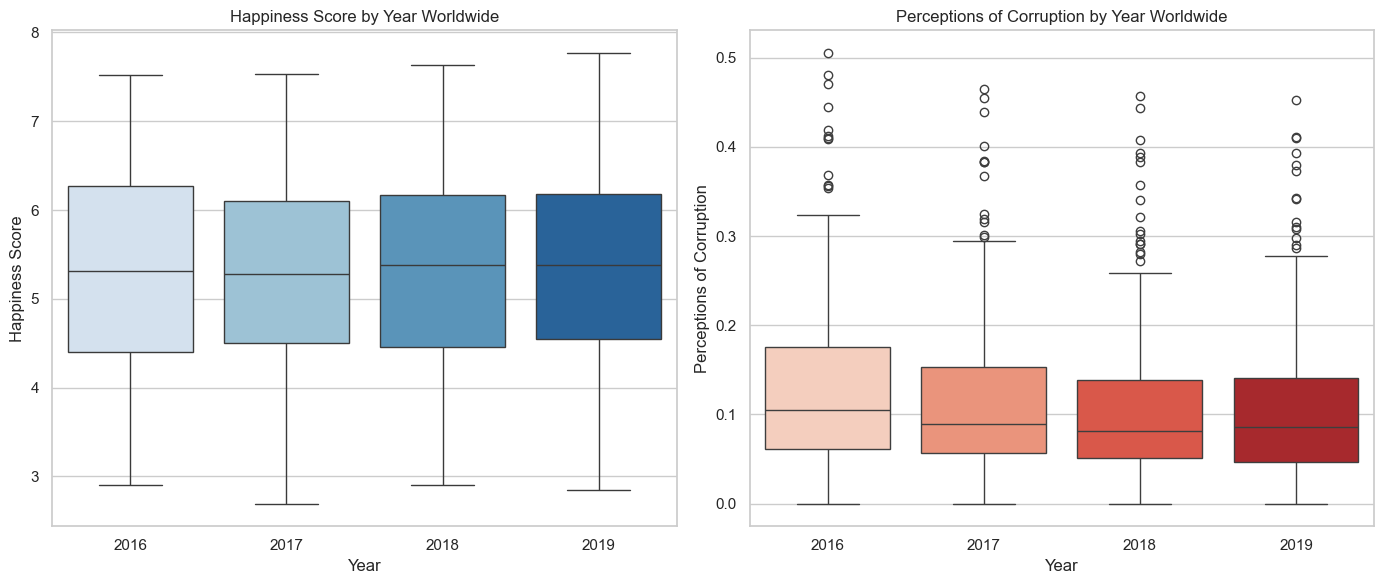

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Happiness Score
sns.boxplot(data=df, x='year', y='happiness_score', ax=axes[0], palette="Blues")
axes[0].set_title('Happiness Score by Year Worldwide')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Happiness Score')

# Boxplot for Perceptions of Corruption
sns.boxplot(data=df, x='year', y='perceptions_corruption', ax=axes[1], palette="Reds")
axes[1].set_title('Perceptions of Corruption by Year Worldwide')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Perceptions of Corruption')

# Avoid overlapping plot titles
plt.tight_layout()
plt.show()


In [19]:
# Métricas descriptivas para happiness_score por año
happiness_stats = df.groupby('year')['happiness_score'].describe()
print("Descriptive statistics for Happiness Score by Year:")
print(happiness_stats)

# Métricas descriptivas para perceptions_corruption por año
corruption_stats = df.groupby('year')['perceptions_corruption'].describe()
print("\nDescriptive statistics for Perceptions of Corruption by Year:")
print(corruption_stats)


Descriptive statistics for Happiness Score by Year:
      count      mean       std    min      25%     50%     75%    max
year                                                                  
2016  157.0  5.382185  1.141674  2.905  4.40400  5.3140  6.2690  7.526
2017  155.0  5.354019  1.131230  2.693  4.50550  5.2790  6.1015  7.537
2018  156.0  5.375917  1.119506  2.905  4.45375  5.3780  6.1685  7.632
2019  156.0  5.407096  1.113120  2.853  4.54450  5.3795  6.1845  7.769

Descriptive statistics for Perceptions of Corruption by Year:
      count      mean       std  min       25%       50%       75%       max
year                                                                        
2016  157.0  0.137624  0.111038  0.0  0.061260  0.105470  0.175540  0.505210
2017  155.0  0.123120  0.101661  0.0  0.057271  0.089848  0.153296  0.464308
2018  156.0  0.112905  0.096843  0.0  0.051000  0.082000  0.139000  0.457000
2019  156.0  0.110603  0.094538  0.0  0.047000  0.085500  0.141250  0.4530

C:\Users\ACER\AppData\Local\Temp\ipykernel_12728\2779725037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='life_expectancy', ax=axes[0], palette="Greens")
C:\Users\ACER\AppData\Local\Temp\ipykernel_12728\2779725037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='freedom', ax=axes[1], palette="Purples")


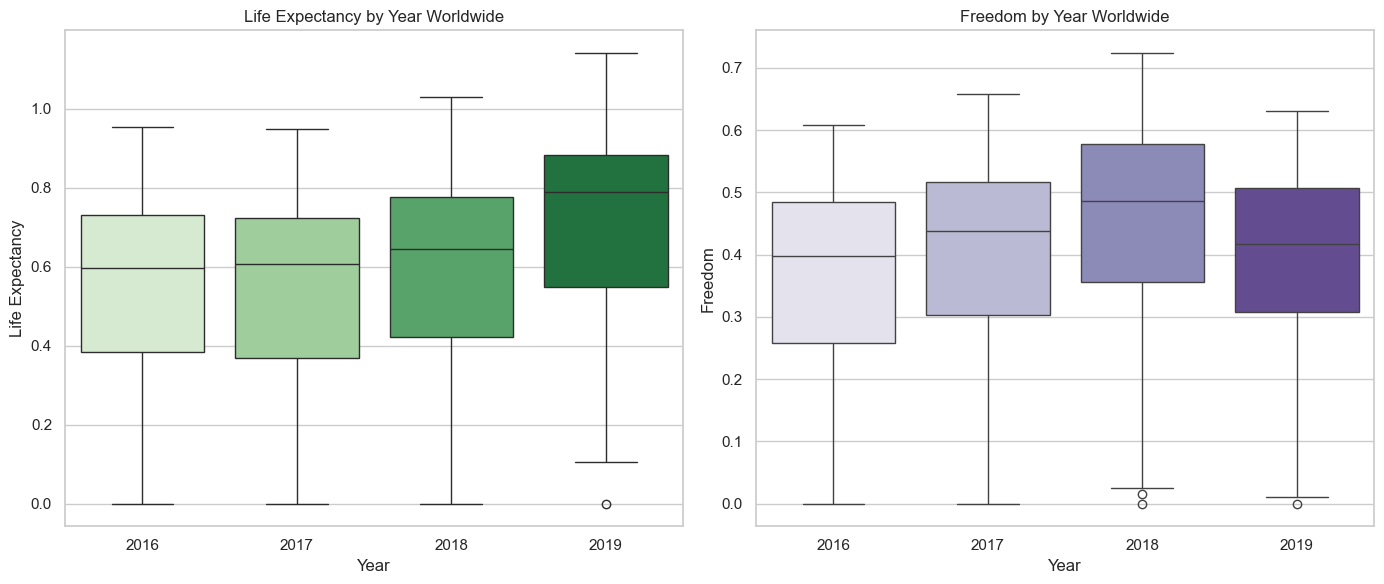

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Life Expectancy
sns.boxplot(data=df, x='year', y='life_expectancy', ax=axes[0], palette="Greens")
axes[0].set_title('Life Expectancy by Year Worldwide')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Life Expectancy')

# Boxplot for Freedom
sns.boxplot(data=df, x='year', y='freedom', ax=axes[1], palette="Purples")
axes[1].set_title('Freedom by Year Worldwide')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Freedom')

plt.tight_layout()
plt.show()


In [ ]:
# descriptive statistics for life expectancy by year
life_expectancy_stats = df.groupby('year')['life_expectancy'].describe()
print("Descriptive statistics for Life Expectancy by Year:")
print(life_expectancy_stats)

# descriptive statistics for freedom by year
freedom_stats = df.groupby('year')['freedom'].describe()
print("\nDescriptive statistics for Freedom by Year:")
print(freedom_stats)

Descriptive statistics for Life Expectancy by Year:
      count      mean       std  min       25%       50%       75%       max
year                                                                        
2016  157.0  0.557619  0.229349  0.0  0.382910  0.596590  0.729930  0.952770
2017  155.0  0.551341  0.237073  0.0  0.369866  0.606042  0.723008  0.949492
2018  156.0  0.597346  0.247579  0.0  0.422250  0.644000  0.777250  1.030000
2019  156.0  0.725244  0.242124  0.0  0.547750  0.789000  0.881750  1.141000

Descriptive statistics for Freedom by Year:
      count      mean       std  min       25%       50%       75%       max
year                                                                        
2016  157.0  0.370994  0.145507  0.0  0.257480  0.397470  0.484530  0.608480
2017  155.0  0.408786  0.149997  0.0  0.303677  0.437454  0.516561  0.658249
2018  156.0  0.454506  0.162424  0.0  0.356000  0.487000  0.578500  0.724000
2019  156.0  0.392571  0.143289  0.0  0.308000  0.417000

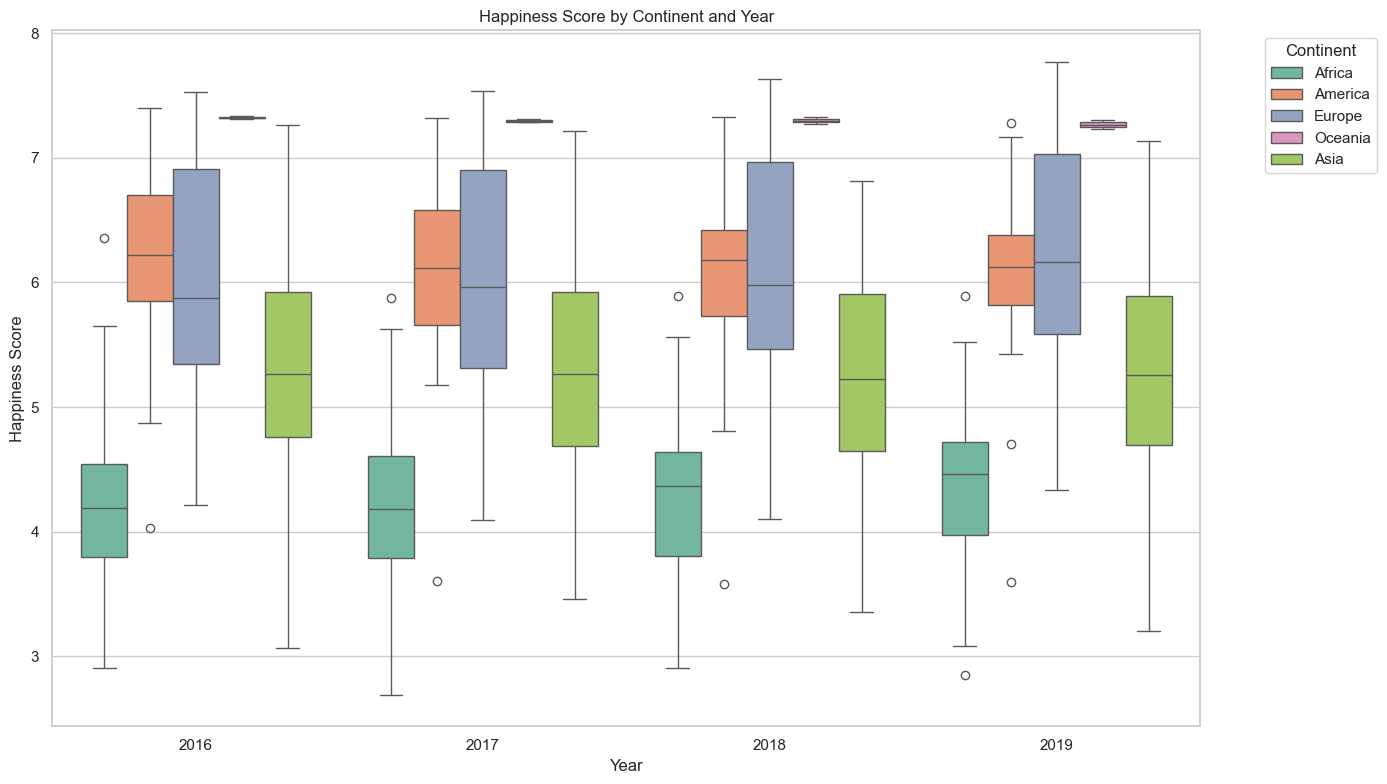

In [59]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='year', y='happiness_score', hue='continent', palette="Set2")
plt.title('Happiness Score by Continent and Year')
plt.xlabel('Year')
plt.ylabel('Happiness Score')

# add legend outside the plot
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


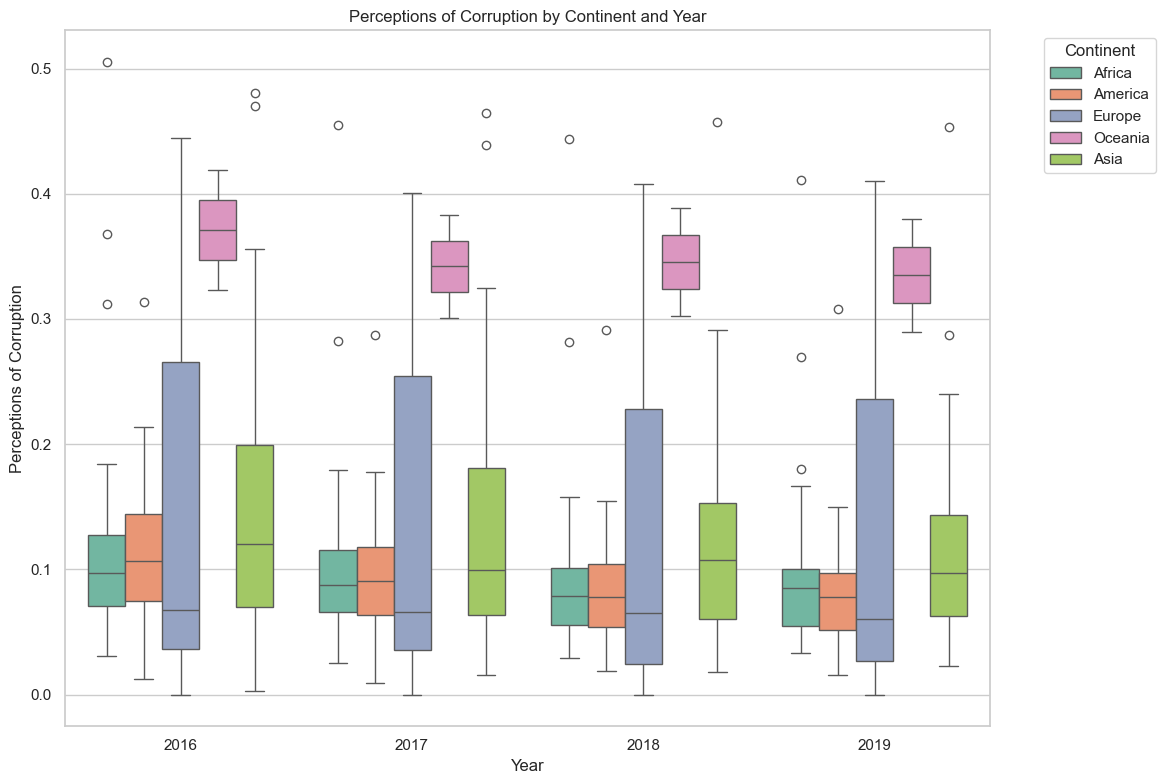

In [60]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='year', y='perceptions_corruption', hue='continent', palette="Set2")
plt.title('Perceptions of Corruption by Continent and Year')
plt.xlabel('Year')
plt.ylabel('Perceptions of Corruption')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


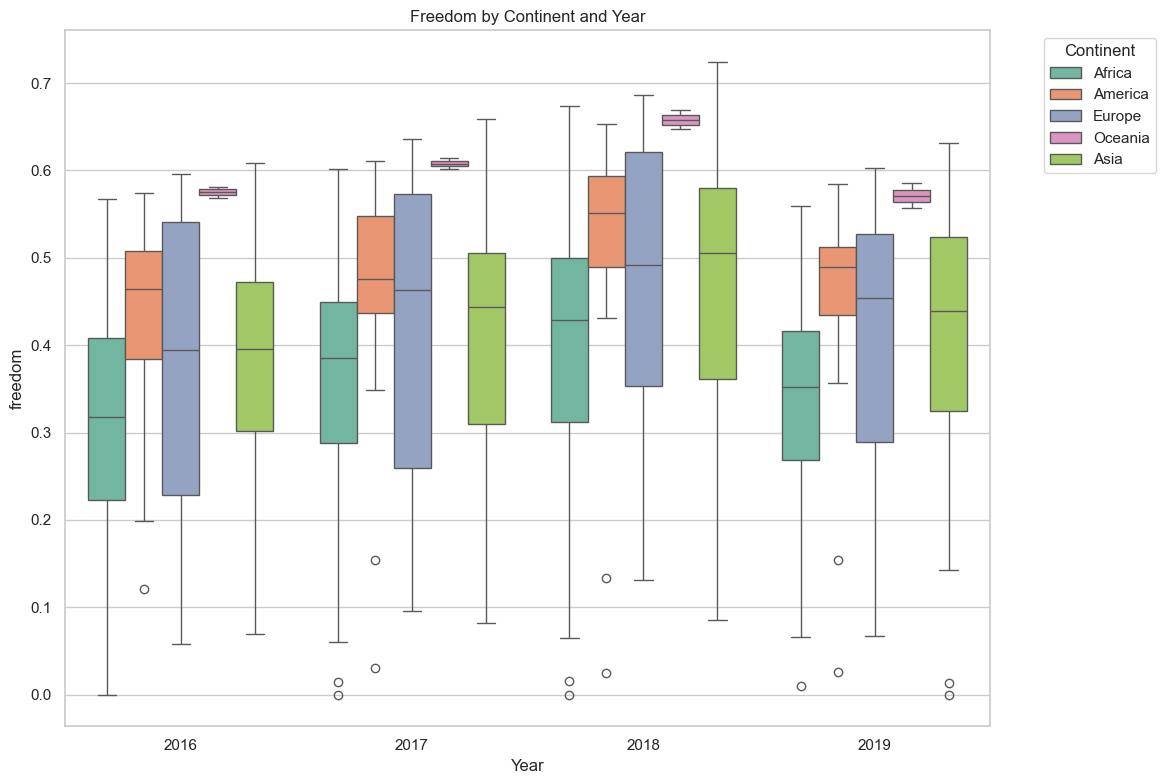

In [64]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='year', y='freedom', hue='continent', palette="Set2")
plt.title('Freedom by Continent and Year')
plt.xlabel('Year')

plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [2]:
from ww_gif_generator import *
create_happiness_gif()

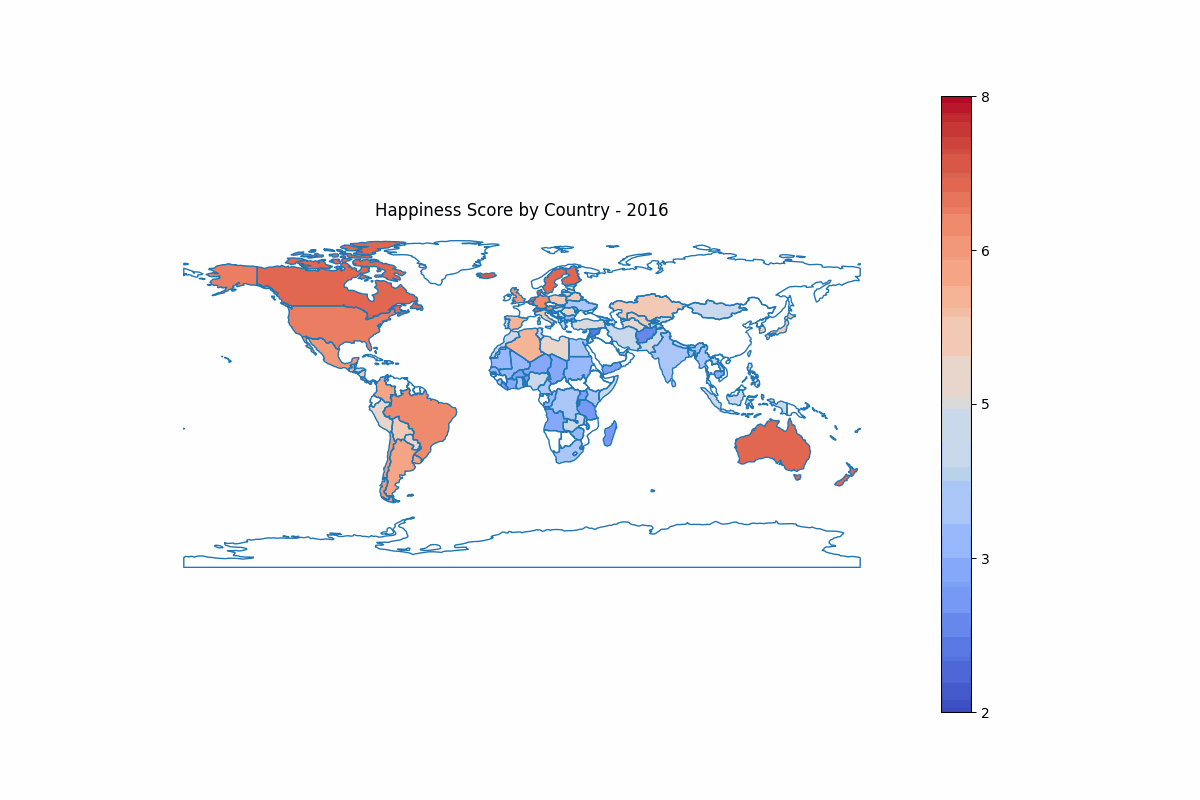

In [2]:
# show the gif
from IPython.display import Image
Image(filename="../visualizations/happiness_score_smooth.gif")